# Module 5 - Modern Portfolio Theory

In this module, We’ll be looking at investment portfolio optimization, the fundamental concept of diversification and the creation of an efficient frontier that can be used by investors to choose specific mixes of assets based on investment goals; that is, the trade off between their desired level of portfolio return vs their desired level of portfolio risk.

Modern Portfolio Theory suggests that it is possible to construct an "efficient frontier" of optimal portfolios, offering the maximum possible expected return for a given level of risk. It suggests that it is not enough to look at the expected risk and return of one particular stock. By investing in more than one stock, an investor can reap the benefits of diversification, particularly a reduction in the riskiness of the portfolio.

MPT quantifies the benefits of diversification, also known as not putting all of your eggs in one basket.

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('fivethirtyeight')

### Query 5.1 
For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [2]:
idbi = pd.read_csv('IDBI.csv')
idbi = idbi[idbi.Series == 'EQ']
idbi.dropna(inplace=True)
idbi = idbi[['Close Price']]

In [3]:
idbi_returns = idbi.pct_change()

mean_returns = idbi_returns.mean()
std_returns  = idbi_returns.std()

annualised_return = mean_returns*252
annualised_std    = std_returns*np.sqrt(252)

annualised_return = round(annualised_return, 3)
annualised_std    = round(annualised_std, 3)

print("The annualised mean return of the stock is ", annualised_return)
print("The annualised volitality of the stock is  ", annualised_std)

The annualised mean return of the stock is  Close Price   -0.296
dtype: float64
The annualised volitality of the stock is   Close Price    0.454
dtype: float64


### Query 5.2
Now, we need to diversify our portfolio.

Building portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20%.

Now calculate the annual returns and volatility of the entire portfolio.

In [4]:
d1 = pd.read_csv('RELIANCE.csv')
d2 = pd.read_csv('VOLTAS.csv')
d3 = pd.read_csv('INFY.csv')
d4 = pd.read_csv('APOLLOTYRE.csv')
d5 = pd.read_csv('MINDTREE.csv')

d1 = d1[d1.Series=='EQ']
d2 = d2[d2.Series=='EQ']
d3 = d3[d3.Series=='EQ']
d4 = d4[d4.Series=='EQ']
d5 = d5[d5.Series=='EQ']

d1.dropna(inplace=True)
d2.dropna(inplace=True)
d3.dropna(inplace=True)
d4.dropna(inplace=True)
d5.dropna(inplace=True)

data = pd.concat([d1['Close Price'], d2['Close Price'], d3['Close Price'], d4['Close Price'], d5['Close Price']], axis = 1)
data.columns = ['REL', 'VOL', 'INFY', 'AT', 'MT']

In [5]:
data.head()

,REL,VOL,INFY,AT,MT
0,1344.10,431.85,951.55,231.90,509.45
1,1356.30,432.45,955.00,234.40,511.30
2,1353.10,430.20,952.80,237.35,506.35
3,1327.35,414.10,961.75,232.65,492.90
4,1318.85,415.75,957.95,234.65,497.50


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 495
Data columns (total 5 columns):
REL     494 non-null float64
VOL     494 non-null float64
INFY    494 non-null float64
AT      494 non-null float64
MT      494 non-null float64
dtypes: float64(5)
memory usage: 23.2 KB
None


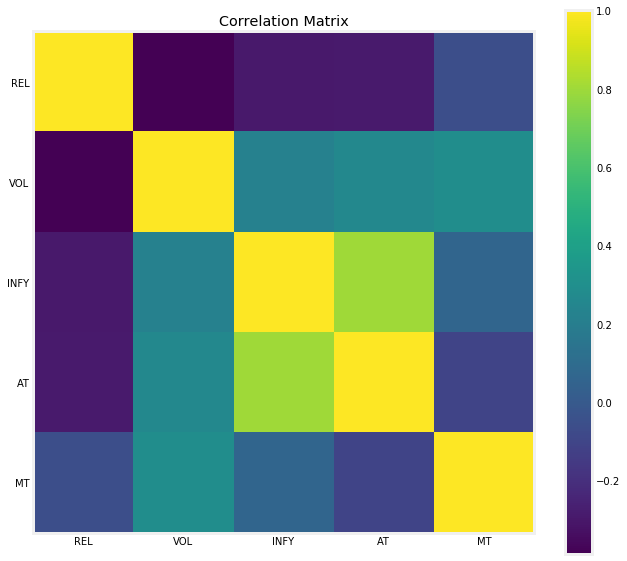

In [7]:
from matplotlib import cm

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
cax = ax1.imshow(data.corr(), interpolation="nearest")
ax1.grid(False)
plt.title('Correlation Matrix')
names=['','REL', 'VOL', 'INFY', 'AT', 'MT']
ax1.set_xticklabels(names)
ax1.set_yticklabels(names)
fig.colorbar(cax)
plt.show()

Comparing Correlation of various stocks as a heatmap

In [8]:
returns = data.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()

In [9]:
weights = np.asarray([0.2, 0.2, 0.2, 0.2, 0.2])

portfolio_return = round(np.sum(mean_returns*weights)*252, 3)

portfolio_std = round(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) *np.sqrt(252),3)

print("The annualised mean return of the portfolio is ", portfolio_return)
print("The annualised volitality of the portfolio is  ", portfolio_std)

The annualised mean return of the portfolio is  0.116
The annualised volitality of the portfolio is   0.195


### Query 5.3
Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility.

Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

### Query5.4
Mark the 2 portfolios where -
- Portfolio 1 - The Sharpe ratio is the highest
- Portfolio 2 - The volatility is the lowest. 

In [10]:
num_portfolios = 50000

dummy_portfolios = np.zeros((3+data.columns.size, num_portfolios))

for i in range(num_portfolios):
    weights = np.array(np.random.random(data.columns.size))
    weights = weights/np.sum(weights)
    portfolio_return = np.sum(mean_returns*weights)*252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) *np.sqrt(252)
    dummy_portfolios[0, i] = portfolio_return
    dummy_portfolios[1, i] = portfolio_std
    dummy_portfolios[2, i] = dummy_portfolios[0, i]/dummy_portfolios[1, i]
    
    for j in range(len(weights)):
        dummy_portfolios[j+3, i] = weights[j];
        
        
dummy_portfolios = pd.DataFrame(dummy_portfolios.T, columns=['ret', 'std', 'Sharpe Ratio', 'REL', 'VOL', 'INFY', 'AT', 'MT'])

max_sharpe = dummy_portfolios.iloc[dummy_portfolios['Sharpe Ratio'].idxmax()]

min_volatility = dummy_portfolios.iloc[dummy_portfolios['std'].idxmin()]

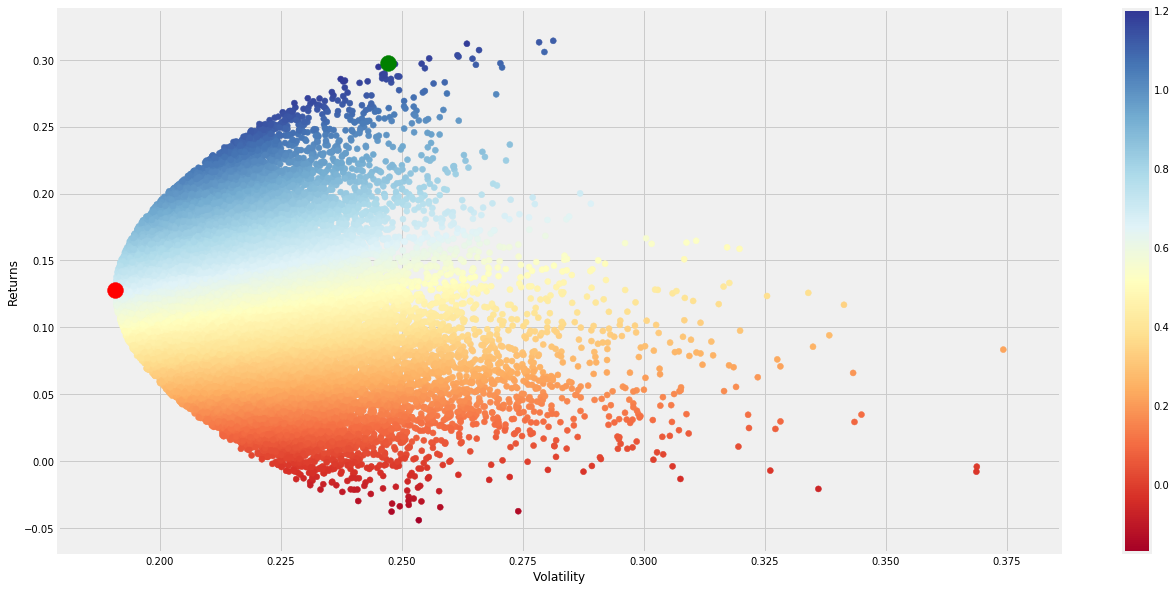

In [11]:
plt.figure(figsize=(20, 10))
plt.scatter(dummy_portfolios['std'], dummy_portfolios.ret, c=dummy_portfolios['Sharpe Ratio'], cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

plt.scatter(max_sharpe[1], max_sharpe[0], color = 'g' ,s = 250)
plt.scatter(min_volatility[1], min_volatility[0], color ='R',s = 250)


In [14]:
print('Max Sharpe ratio in the array is loacted at (i.e the green dot): {}'.format(dummy_portfolios['Sharpe Ratio'].argmax()))
print('Minimum Volitality in the array is located at (i.e the red dot): {}'.format(dummy_portfolios['std'].argmin()))

Max Sharpe ratio in the array is loacted at (i.e the green dot): 33484
Minimum Volitality in the array is located at (i.e the red dot): 41245


In this way, we can go through various portfolio combinations as this plot and visulaize which portfolio suits us best.

Next step can be drawing efficient frontier on this graph for finding desirable portfolio.